In [32]:
import importlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import MyPyTable
importlib.reload(MyPyTable)
from MyPyTable import MyPyTable

import utils
importlib.reload(utils)
import numpy as np
from classifier import MyKNeighborsClassifier

# python virtual environments!!!


# Base Dataset

Loading and formatting the initial titanic dataset. Using CPSC 322 MyPyTable that I wrote the functions for.

In [33]:
titanic_intro = MyPyTable()
titanic_intro.load_from_file("input_data/Titanic-Dataset.csv")

titanic_intro.remove_rows_with_missing_values()
titanic_intro.pretty_print()


  PassengerId    Survived    Pclass  Name                                                                                Sex       Age    SibSp    Parch  Ticket                 Fare  Cabin            Embarked
-------------  ----------  --------  ----------------------------------------------------------------------------------  ------  -----  -------  -------  -----------------  --------  ---------------  ----------
            2           1         1  Cumings, Mrs. John Bradley (Florence Briggs Thayer)                                 female  38           1        0  PC 17599            71.2833  C85              C
            4           1         1  Futrelle, Mrs. Jacques Heath (Lily May Peel)                                        female  35           1        0  113803.0            53.1     C123             S
            7           0         1  McCarthy, Mr. Timothy J                                                             male    54           0        0  17463.0             51

# Visualizations  
Initial visualizations of the unprocessed dataset

In [34]:
classes = titanic_intro.get_column("Pclass")
unique_classes = []
for value in classes:
    if value in unique_classes:
        pass
    else:
        unique_classes.append(value)
print(unique_classes)

unique_set = set(classes)
print(unique_set)

[1.0, 3.0, 2.0]
{1.0, 2.0, 3.0}


#### Bar Chart!

In [35]:
survived = titanic_intro.get_column("Survived")
passender_id = titanic_intro.get_column("PassengerId")

# print(age)


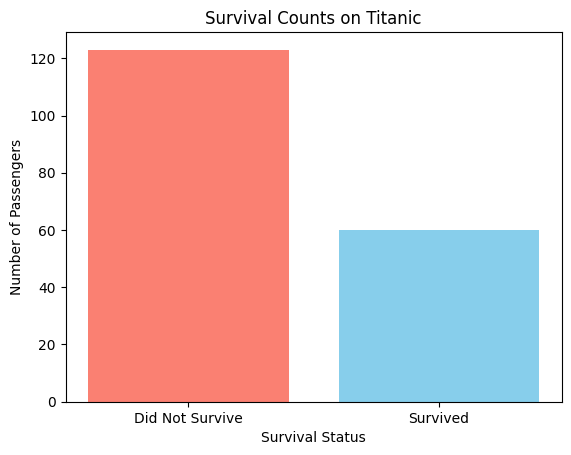

In [36]:
# this took way too long to fix...
survived_counts = pd.Series(titanic_intro.get_column("Survived")).value_counts()

# plot the bar chart
plt.bar(['Did Not Survive', 'Survived'], survived_counts, color=['salmon', 'skyblue'])

# making the plot pretty
plt.title("Survival Counts on Titanic")
plt.ylabel("Number of Passengers")
plt.xlabel("Survival Status")
plt.show()


# Summary Statistics  
For each column, the average, median, mode are computed and displayed for continuous values.

* Pclass, Age and Fare...
* correlation matrix
* feature selection

1. split
2. statistics
    * mean
    * median 
    * stdev
3. compare to whole dataset
keep code arbitrary

separate into train testing
use covariance on numerical features (come up with a formula)
try to determine what city was embarked from
in the testing set try to predict embarked
transform data, split, choose best features and evaluate accuracy
take the highest probability and ask if that is the actual port

# Finding Covariance

In [37]:
titanic_intro.remove_rows_with_missing_values()
titanic_intro.pretty_print()

  PassengerId    Survived    Pclass  Name                                                                                Sex       Age    SibSp    Parch  Ticket                 Fare  Cabin            Embarked
-------------  ----------  --------  ----------------------------------------------------------------------------------  ------  -----  -------  -------  -----------------  --------  ---------------  ----------
            2           1         1  Cumings, Mrs. John Bradley (Florence Briggs Thayer)                                 female  38           1        0  PC 17599            71.2833  C85              C
            4           1         1  Futrelle, Mrs. Jacques Heath (Lily May Peel)                                        female  35           1        0  113803.0            53.1     C123             S
            7           0         1  McCarthy, Mr. Timothy J                                                             male    54           0        0  17463.0             51

In [38]:
# Mapping each port to an integer
embark_mapping = {'S': 0, 'C': 1, 'Q': 2}

# Convert embarked values into separate binary lists
embark_S = [(1 if row[11] == 'S' else 0) for row in titanic_intro.data]
embark_C = [(1 if row[11] == 'C' else 0) for row in titanic_intro.data]
embark_Q = [(1 if row[11] == 'Q' else 0) for row in titanic_intro.data]

# Convert sex to int
sex_mapping = {'female': 0, 'male': 1}
numeric_sex = [sex_mapping[row[4]] for row in titanic_intro.data]

covariance_table = [
    [embark_Q[i], embark_C[i], embark_S[i], row[1], row[2], numeric_sex[i],
     row[5], row[6], row[7], row[9]] for i, row in enumerate(titanic_intro.data)
]

# covariance_table = np.array(covariance_table, dtype=np.float64)

# Compute covariance
covariance = np.cov(covariance_table, rowvar=False)
print(covariance)


[[ 1.08689125e-02 -3.90320062e-03 -6.96571188e-03 -1.89155107e-03
  -2.10172341e-03 -2.10172341e-04  3.10502612e-02  1.13793311e-02
  -5.22428391e-03  1.24368474e-01]
 [-3.90320062e-03  2.30288837e-01 -2.26385636e-01  2.36894253e-02
  -5.73169999e-02 -1.50723593e-02  6.38254369e-01 -1.75343782e-02
  -2.69320843e-02  8.80715508e+00]
 [-6.96571188e-03 -2.26385636e-01  2.33351348e-01 -2.17978743e-02
   5.94187234e-02  1.52825317e-02 -6.69304630e-01  6.15504714e-03
   3.21563682e-02 -8.93152355e+00]
 [-1.89155107e-03  2.36894253e-02 -2.17978743e-02  2.21581697e-01
  -8.37686903e-03 -1.25562962e-01 -1.87106828e+00  3.22464421e-02
   8.37686903e-03  4.82446391e+00]
 [-2.10172341e-03 -5.73169999e-02  5.94187234e-02 -8.37686903e-03
   2.65417642e-01 -1.19197742e-02 -2.47035669e+00 -3.43781901e-02
   1.84651414e-02 -1.23992841e+01]
 [-2.10172341e-04 -1.50723593e-02  1.52825317e-02 -1.25562962e-01
  -1.19197742e-02  2.51005825e-01  1.44972257e+00 -3.36575992e-02
  -3.38677716e-02 -4.98913154e+00

# Plotting the Covariance of Embarked Passengers

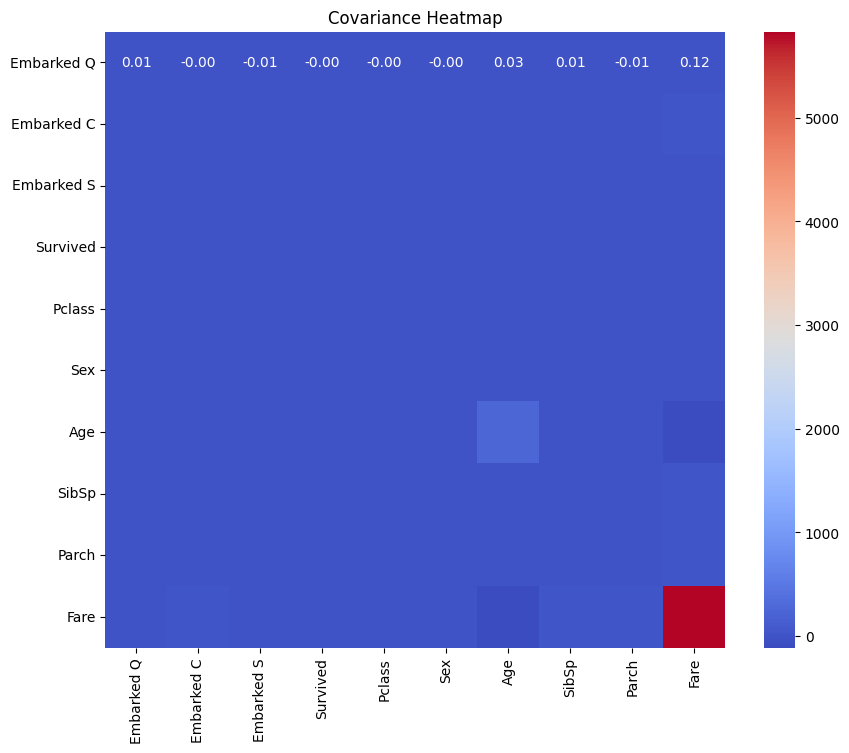

In [39]:
# plot the data
feature_names = ['Embarked Q', 'Embarked C', 'Embarked S', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(covariance, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=feature_names, yticklabels=feature_names)

# Title and labels
plt.title("Covariance Heatmap")
plt.show()

# Correlation

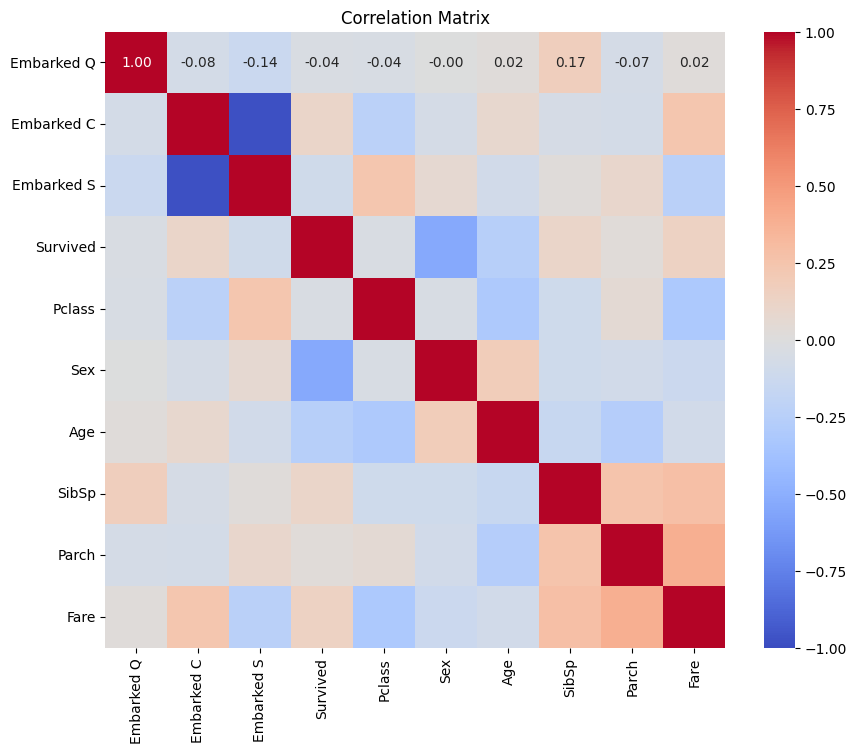

In [41]:
correlation = np.corrcoef(covariance_table, rowvar=False)

# plot correltion
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=feature_names, yticklabels=feature_names, vmin=-1, vmax=1)

# Title and labels
plt.title("Correlation Matrix")
plt.show()

# Splitting the Dataset

In [42]:
# Separate X and y datasets
X = [[row[2], row[9]]
    for i, row in enumerate(titanic_intro.data)
    ]
y = [numeric_embark[i] for i in range(len(titanic_intro.data))]

# print(X)
# print()
# print(y)
# print()
# print(len(titanic_intro.data))

In [43]:
# Split into train and test sets
X_train, X_test, y_train, y_test = utils.train_test_split(X, y, 0.5, 100)

# Use Classifier (KNN) to Predict Embarked Value

In [44]:
knn = MyKNeighborsClassifier(2)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
knn_accuracy = utils.accuracy_score(y_test, y_pred_knn)

print(knn_accuracy)

0.7065217391304348
